<a href="https://colab.research.google.com/github/abdulazizkomilov/Data-Science/blob/main/Aviakompaniya_Qoniqish_darajasi_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [118]:
df = pd.read_csv('/content/train_dataset.csv',index_col=['id'])
df_test = pd.read_csv('/content/test_dataset.csv',index_col=['id'])
sample_sub = pd.read_csv('/content/sample_submission.csv')

print(df.shape)
print(df_test.shape)
sample_sub

(10000, 23)
(4000, 22)


,id,satisfaction
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
3995,3996,0
3996,3997,0
3997,3998,0
3998,3999,0


In [119]:
df_test.sample(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
1009,Male,Loyal Customer,48,Business travel,Eco,295,4,1,1,1,...,5,5,3,2,3,5,2,5,44,30.0
423,Male,Loyal Customer,63,Business travel,Eco,255,2,5,3,5,...,2,2,4,1,3,2,3,2,0,0.0
902,Female,Loyal Customer,45,Business travel,Business,502,4,4,4,4,...,5,5,5,4,5,3,5,3,0,0.0
1255,Male,Loyal Customer,30,Business travel,Business,606,3,5,5,5,...,3,3,4,5,4,1,4,3,0,4.0
2954,Female,Loyal Customer,26,Personal Travel,Eco,1075,3,5,3,4,...,3,3,3,4,4,5,4,3,0,0.0


In [120]:
df.sample(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
3922,Male,disloyal Customer,24,Business travel,Eco,874,1,1,1,3,...,2,4,3,4,4,5,2,4,0.0,0
4348,Male,disloyal Customer,23,Business travel,Eco,166,2,4,1,4,...,4,3,3,4,1,4,4,0,0.0,0
3688,Female,disloyal Customer,17,Business travel,Eco,878,1,2,2,3,...,4,5,3,5,4,4,4,0,0.0,0
2847,Male,Loyal Customer,65,Personal Travel,Eco,473,2,5,2,1,...,3,5,1,5,5,3,5,146,157.0,0
594,Female,Loyal Customer,31,Business travel,Eco,679,4,2,3,2,...,4,2,2,1,5,3,4,0,0.0,1
342,Male,Loyal Customer,37,Business travel,Eco,862,3,4,4,4,...,3,4,5,4,1,3,3,5,10.0,0
1268,Male,Loyal Customer,48,Business travel,Eco,1107,4,5,5,5,...,4,3,5,4,1,2,4,0,0.0,1
4725,Male,Loyal Customer,9,Personal Travel,Eco,523,4,5,4,2,...,4,4,5,5,5,4,4,0,0.0,0
5530,Male,Loyal Customer,41,Business travel,Business,1814,5,5,5,5,...,3,3,4,3,4,3,3,0,0.0,1


In [121]:
print('Data.describe')
df.describe(include= 'all').T

Data.describe


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,10000,2,Female,5169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Type,10000,2,Loyal Customer,8307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,39.3751,14.897959,7.0,27.0,40.0,51.0,80.0
Type of Travel,10000,2,Business travel,7079,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Class,10000,3,Business,5048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight Distance,10000.0,NaN,NaN,NaN,1229.5562,1022.281958,31.0,421.0,863.5,1806.75,4983.0
Inflight wifi service,10000.0,NaN,NaN,NaN,2.7802,1.362745,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,10000.0,NaN,NaN,NaN,3.0651,1.527316,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,10000.0,NaN,NaN,NaN,2.7978,1.421168,0.0,2.0,3.0,4.0,5.0
Gate location,10000.0,NaN,NaN,NaN,2.981,1.283278,1.0,2.0,3.0,4.0,5.0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int

In [123]:
df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [124]:
df.nunique()

Gender                                  2
Customer Type                           2
Age                                    74
Type of Travel                          2
Class                                   3
Flight Distance                      2421
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           5
Food and drink                          6
Online boarding                         6
Seat comfort                            6
Inflight entertainment                  6
On-board service                        5
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Inflight service                        5
Cleanliness                             6
Departure Delay in Minutes            239
Arrival Delay in Minutes              242
satisfaction                            2
dtype: int64

In [125]:
df[['Class']].groupby(['Class']).size()

Class
Business    5048
Eco         4251
Eco Plus     701
dtype: int64

In [126]:
gender = {"Female": 1, "Male": 0}
df['Gender'] = df['Gender'].map(gender) 

customer_type = {"Loyal Customer": 1, "disloyal Customer": 0}
df['Customer Type'] = df['Customer Type'].map(customer_type) 

travel_type = {"Business travel": 2, "Personal Travel": 1}
df['Type of Travel'] = df['Type of Travel'].map(travel_type)  
 
classes = {"Business": 3, "Eco Plus": 2, "Eco": 1}
df['Class'] = df['Class'].map(classes)  

In [127]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [128]:
Y = 'satisfaction'

0    5000
1    5000
Name: satisfaction, dtype: int64


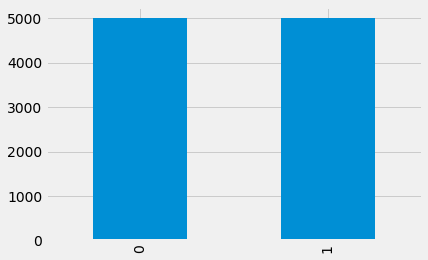

In [129]:
print(df[Y].value_counts())
df[Y].value_counts().plot(kind='bar')
plt.show()

In [130]:
nulls = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
nulls

,Null Values,Percentage Null Values
Gender,0,0.00
Customer Type,0,0.00
Age,0,0.00
Type of Travel,0,0.00
Class,0,0.00
Flight Distance,0,0.00
Inflight wifi service,0,0.00
Departure/Arrival time convenient,0,0.00
Ease of Online booking,0,0.00
Gate location,0,0.00


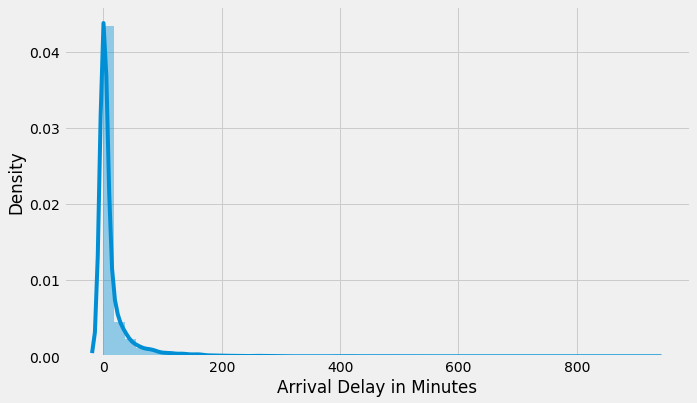

In [131]:
fig = plt.figure(figsize=(10,6))
sns.distplot(df['Arrival Delay in Minutes']); 
plt.show()

In [132]:
df['Arrival Delay in Minutes'].nunique()

242

In [133]:
df['Arrival Delay in Minutes'].value_counts()

0.0      5729
1.0       207
2.0       197
3.0       188
4.0       178
         ... 
314.0       1
128.0       1
267.0       1
145.0       1
210.0       1
Name: Arrival Delay in Minutes, Length: 242, dtype: int64

In [134]:
median = df["Arrival Delay in Minutes"].median()
df["Arrival Delay in Minutes"].fillna(median) 

id
1          3.0
2          0.0
3         18.0
4          0.0
5         10.0
         ...  
9996      12.0
9997      21.0
9998      38.0
9999     210.0
10000      0.0
Name: Arrival Delay in Minutes, Length: 10000, dtype: float64

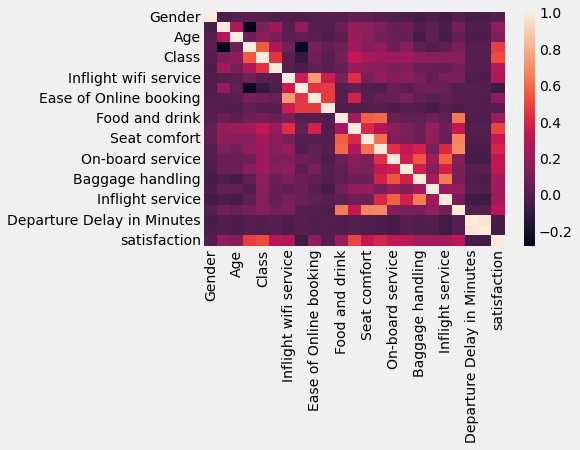

In [135]:
sns.heatmap(df.corr())
plt.show()

In [136]:
df.corrwith(df['satisfaction']).sort_values(ascending=False)

satisfaction                         1.000000
Class                                0.518931
Online boarding                      0.504986
Type of Travel                       0.482266
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Customer Type                        0.181592
Ease of Online booking               0.164662
Age                                  0.144302
Gate location                        0.007169
Gender                               0.002601
Departure Delay in Minutes          -0.042960
Arrival Delay in Minutes          

In [137]:
X = df.copy()
y = df.satisfaction
X = X.drop(Y,axis=1)

In [138]:
%%time
model = lgb.LGBMClassifier()
model.fit(X,y)

CPU times: user 564 ms, sys: 11.1 ms, total: 575 ms
Wall time: 315 ms


LGBMClassifier()

In [139]:
FOLD = 5

from sklearn.model_selection import cross_val_score
print("Cross-Validation Score :",cross_val_score(model, X, y, cv=FOLD,scoring='roc_auc').mean())

Cross-Validation Score : 0.9924481999999999


In [140]:
gender = {"Female": 1, "Male": 0}
df_test['Gender'] = df_test['Gender'].map(gender) 

customer_type = {"Loyal Customer": 1, "disloyal Customer": 0}
df_test['Customer Type'] = df_test['Customer Type'].map(customer_type) 

travel_type = {"Business travel": 2, "Personal Travel": 1}
df_test['Type of Travel'] = df_test['Type of Travel'].map(travel_type)  
 
classes = {"Business": 3, "Eco Plus": 2, "Eco": 1}
df_test['Class'] = df_test['Class'].map(classes)  


In [141]:
natija = model.predict_proba(df_test)

In [143]:
sample_sub['satisfaction'] = natija
sample_sub

,id,satisfaction
0,1,0.998122
1,2,0.488361
2,3,0.001016
3,4,0.000347
4,5,0.687320
...,...,...
3995,3996,0.096000
3996,3997,0.998874
3997,3998,0.988592
3998,3999,0.006005
